# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** **Muhamad Syabaini**
- **Email:** **muhamadsyabaini@gmail.com**
- **ID Dicoding:** **muhamad_syabaini**

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana frekuensi pembelian pelanggan bervariasi di berbagai kota dan provinsi?

- Pertanyaan 2: Bagaimana tren rata-rata waktu pengiriman (dari tanggal pembelian hingga pengiriman ke pelanggan) dari waktu ke waktu?
- Pertanyaan 3:Kota mana yang memiliki jumlah pembeli terbanyak?

## Import Semua Packages/Library yang Digunakan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from datetime import datetime

## Data Wrangling

### Gathering Data

In [ ]:
customers_df = pd.read_csv('/content/drive/MyDrive/submmission/data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation_df = pd.read_csv('/content/drive/MyDrive/submmission/data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
order_items_df = pd.read_csv('/content/drive/MyDrive/submmission/data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments_df = pd.read_csv('/content/drive/MyDrive/submmission/data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews_df = pd.read_csv('/content/drive/MyDrive/submmission/data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orders_df = pd.read_csv('/content/drive/MyDrive/submmission/data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
product_category_name_translation_df = pd.read_csv('/content/drive/MyDrive/submmission/data/product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
products_df = pd.read_csv('/content/drive/MyDrive/submmission/data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers_df = pd.read_csv('/content/drive/MyDrive/submmission/data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Setiap dataset memuat informasi berbeda yang saling terhubung melalui kunci seperti order_id, customer_id, review_id, seller_id, dan product_id.
- Data harus dihubungkan untuk menjawab pertanyaan bisnis.

### Assessing Data

Periksa Semua Tipe Data, jumlah kolom, dan missing values

In [ ]:
print("Customers Info:")
print(customers_df.info())
print("\nGeolocation Info:")
print(geolocation_df.info())
print("\nOrder Items Info:")
print(order_items_df.info())
print("\nOrder Payments Info:")
print(order_payments_df.info())
print("\nOrder Reviews Info:")
print(order_reviews_df.info())
print("\nOrders Info:")
print(orders_df.info())
print("\nProduct Category Name Translation Info:")
print(product_category_name_translation_df.info())
print("\nProducts Info:")
print(products_df.info())
print("\nSellers Info:")
print(sellers_df.info())

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Geolocation Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geoloca

Memeriksa missing values di setiap dataset

In [ ]:
print("Customers Info data null:")
print(customers_df.isna().sum())
print("\nGeolocation Info data null:")
print(geolocation_df.isna().sum())
print("\nOrder Items Info data null:")
print(order_items_df.isna().sum())
print("\nOrder Payments Info data null:")
print(order_payments_df.isna().sum())
print("\nOrder Reviews Info data null:")
print(order_reviews_df.isna().sum())
print("\nOrders Info data null:")
print(orders_df.isna().sum())
print("\nProduct Category Name Translation Info data null:")
print(product_category_name_translation_df.isna().sum())
print("\nProducts Info data null:")
print(products_df.isna().sum())
print("\nSellers Info data null:")
print(sellers_df.isna().sum())

Customers Info data null:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Geolocation Info data null:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Order Items Info data null:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Order Payments Info data null:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Order Reviews Info data null:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_

Memeriksa duplikasi

In [ ]:
print("Customers Info data duplikat:")
print(customers_df.duplicated().sum())
print("\nGeolocation Info data duplikat:")
print(geolocation_df.duplicated().sum())
print("\nOrder Items Info data duplikat:")
print(order_items_df.duplicated().sum())
print("\nOrder Payments Info data duplikat:")
print(order_payments_df.duplicated().sum())
print("\nOrder Reviews Info data duplikat:")
print(order_reviews_df.duplicated().sum())
print("\nOrders Info data duplikat:")
print(orders_df.duplicated().sum())
print("\nProduct Category Name Translation Info data duplikat:")
print(product_category_name_translation_df.duplicated().sum())
print("\nProducts Info data duplikat:")
print(products_df.duplicated().sum())
print("\nSellers Info data duplikat:")
print(sellers_df.duplicated().sum())

Customers Info data duplikat:
0

Geolocation Info data duplikat:
261831

Order Items Info data duplikat:
0

Order Payments Info data duplikat:
0

Order Reviews Info data duplikat:
0

Orders Info data duplikat:
0

Product Category Name Translation Info data duplikat:
0

Products Info data duplikat:
0

Sellers Info data duplikat:
0


In [ ]:
print("Customers Info data describe:")
print(customers_df.describe(include='all'))
print("\nGeolocation Info data describe:")
print(geolocation_df.describe(include='all'))
print("\nOrder Items Info data describe:")
print(order_items_df.describe(include='all'))
print("\nOrder Payments Info data describe:")
print(order_payments_df.describe(include='all'))
print("\nOrder Reviews Info data describe:")
print(order_reviews_df.describe(include='all'))
print("\nOrders Info data describe:")
print(orders_df.describe(include='all'))
print("\nProduct Category Name Translation Info data describe:")
print(product_category_name_translation_df.describe(include='all'))
print("\nProducts Info data describe:")
print(products_df.describe(include='all'))
print("\nSellers Info data describe:")
print(sellers_df.describe(include='all'))

Customers Info data describe:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix 

**Insight:**
- xxx
- xxx

### Cleaning Data

Konversi kolom tanggal menjadi tipe datetime

In [ ]:
# Mengonversi kolom tanggal
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'], errors='coerce')
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'], errors='coerce')

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], errors='coerce')
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'], errors='coerce')
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_approved_at'], errors='coerce')
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], errors='coerce')
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_approved_at'], errors='coerce')

order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

Kolom review_comment_title dan review_comment_message memiliki banyak missing value.

In [ ]:
# Mengisi missing values pada kolom review_comment_title dan review_comment_message
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('No Title')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('No Comment')

In [ ]:
# Validasi data setelah pembersihan
print("Order Reviews Info Nulls:\n", order_reviews_df.isna().sum())

Order Reviews Info Nulls:
 review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


Kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date memiliki missing values. saya mau mengambil data status yang terkirim

In [ ]:
# Menghapus pesanan yang dibeli yang tidak disetujui oleh penjual
orders_df['order_purchase_timestamp'].isnull().sum()
orders_df['order_approved_at'].isnull().sum()
orders_df = orders_df.dropna(subset=['order_approved_at'])

Terdapat banyak missing values di beberapa kolom di tabel Products Info

In [ ]:
# Mengisi missing values di produk
most_common_category = products_df['product_category_name'].mode()[0]

In [ ]:
products_df['product_category_name'] = products_df['product_category_name'].fillna(most_common_category)

In [ ]:
# Mengisi missing values dengan median atau nilai lain yang sesuai
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(0)
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(0)
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(0)
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(products_df['product_weight_g'].median())
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(products_df['product_length_cm'].median())
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(products_df['product_height_cm'].median())
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(products_df['product_width_cm'].median())

In [ ]:
print("Products Info Nulls:\n", products_df.isna().sum())

Products Info Nulls:
 product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [ ]:
# Menghapus baris duplikat pada Geolocation Info
geolocation_cleaned = geolocation_df.drop_duplicates()

# Mengecek kembali apakah duplikasi telah dihilangkan
print(geolocation_cleaned.duplicated().sum())

0


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore Customers Data

In [ ]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
71752,f6fae9d4a652ea92e78dbc6956e0c0b8,44e64b7162915525578f601e73e72b16,18071,sorocaba,SP
1840,0b65a4d0707c6168a14491999220a2bc,d8e902319a9ed628de1ed00785b9e09f,35701,sete lagoas,MG
12571,bd394e7a5c0a3aa178be002bec55877c,21b318668bb97ce15c5bb21e0275060f,27213,volta redonda,RJ
30594,0b5ed41783e17d8e75af1284dff5b43d,37cb035c10492203946b0089366008b9,66045,belem,PA
56125,7b2c888b9cc6cef7b7294d42d1600fc1,6150c48a9373c851e1de0db93da09bd6,29730,baixo guandu,ES


In [ ]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
customer_id_duplicates = customers_df['customer_unique_id'].value_counts().loc[lambda x: x > 1]
print(customer_id_duplicates.head(10))  # Menampilkan pelanggan yang melakukan pesanan lebih dari 1 kali

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
63cfc61cee11cbe306bff5857d00bfe4     6
47c1a3033b8b77b3ab6e109eb4d5fdf3     6
12f5d6e1cbf93dafd9dcc19095df0b3d     6
de34b16117594161a6a89c50b289d35a     6
dc813062e0fc23409cd255f7f53c7074     6
Name: count, dtype: int64


In [ ]:
# Menghitung jumlah pelanggan unik per kota
pelanggan_per_kota = customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
print("Jumlah pelanggan unik per kota:")
print(pelanggan_per_kota.head(10))  # Menampilkan 10 kota teratas

Jumlah pelanggan unik per kota:
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64


In [ ]:
# Menghitung jumlah pelanggan unik per provinsi
pelanggan_per_provinsi = customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
print("Jumlah pelanggan unik per provinsi:")
print(pelanggan_per_provinsi)


Jumlah pelanggan unik per provinsi:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64


### Explore Orders Data

In [ ]:
# Menghitung penjualan bulanan
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6946,fcb25cc2887d15b5373673a0630ad13a,3379c7a16d562a9dbdf4b6a3d55754b3,delivered,2017-09-03 17:20:56,2017-09-03 17:30:19,2017-09-03 17:30:19,2017-09-14 18:13:25,2017-09-03 17:30:19
97743,bf63ff8d7ca75098eaba0418489ad64d,bbb43aad9fde7b0d46df42c694e8458d,delivered,2018-08-17 13:15:40,2018-08-17 14:30:12,2018-08-17 14:30:12,2018-08-27 15:34:57,2018-08-17 14:30:12
11866,c6d1a5c57fad5bad0bbd84e39faa1d3d,7f1ade3c78f6fa7c27d75391359d5c39,delivered,2018-02-06 18:19:58,2018-02-08 07:55:33,2018-02-08 07:55:33,2018-02-17 11:23:31,2018-02-08 07:55:33
16104,5ed9945dd12f94f9b11d0bf198bf68e1,95a30d9bc844762418c8d8ecbdbebfe6,delivered,2017-10-24 22:35:35,2017-10-26 03:08:53,2017-10-26 03:08:53,2017-11-04 03:41:42,2017-10-26 03:08:53
85050,b457d7e47d6cdeb247295594ca600cb4,6d207296a79092cb51acbeabdac7b375,delivered,2018-03-30 14:57:39,2018-04-03 05:48:36,2018-04-03 05:48:36,2018-04-05 21:18:30,2018-04-03 05:48:36


In [ ]:
deliveryTime = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
deliveryTime = deliveryTime.apply(lambda x: x.total_seconds())
orders_df["deliveryTime"] = round(deliveryTime/86400)

In [ ]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,deliveryTime
49106,9c8af7daf8716cde23b513de7b15ac08,ff707e35417fa22a89eab6549e33ea5b,delivered,2018-03-01 19:21:56,2018-03-01 19:35:44,2018-03-01 19:35:44,2018-03-15 17:52:45,2018-03-01 19:35:44,14.0
67547,e8794f8491ea025138cfb2005b927693,57753ca70682fa16e7780c6f0189d105,delivered,2017-06-24 19:28:36,2017-06-27 04:05:44,2017-06-27 04:05:44,2017-06-28 13:57:55,2017-06-27 04:05:44,1.0
13724,d6cae08d072e981cb8ff02592b04985b,69ba3a372c54f057939e1d3045d8e653,delivered,2017-02-13 20:16:42,2017-02-13 20:30:19,2017-02-13 20:30:19,2017-02-17 08:25:57,2017-02-13 20:30:19,3.0
52964,186efcd656d8ac4332156f594df02572,78d601a14d29913633ba202e053d69b4,delivered,2017-08-03 20:12:38,2017-08-03 22:32:55,2017-08-03 22:32:55,2017-08-15 21:41:27,2017-08-03 22:32:55,12.0
97138,2b950091945098a44e96447b5c4d9e85,8450bc4f0cf0fba040163c4024ae86d1,delivered,2017-11-19 03:32:40,2017-11-19 05:32:38,2017-11-19 05:32:38,2017-11-27 22:48:25,2017-11-19 05:32:38,9.0


<Axes: >

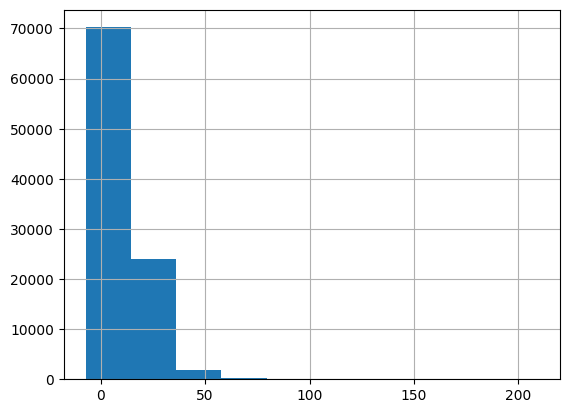

In [ ]:
orders_df.deliveryTime.hist()

In [ ]:
customer_id_in_orders_df = orders_df.customer_id.values

customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")

customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
76127,744ffbbbb5e51c8c5ea3f12cf97d7f8d,401f04c5c71087ab774f6db7b8297068,88160,biguacu,SC,Active
71392,443b824d5ac24a91cb0bf13cc0e67122,dd9adaba239fa74b163997a874959dfc,80810,curitiba,PR,Active
60551,17497fd62d5b93c7d1b720271f313439,e2673f99f267b46ab3264b6d8183059d,24431,sao goncalo,RJ,Active
34402,14b8fc48b9f66832dfca6333034c46cb,55010d2363c2d28c4c52f7952a6079ad,28660,bom jardim,RJ,Active
7983,806f7c1753a3be75c708138b58666ea3,e191f967ed2ad2b93ad1c8117e6daa1a,52051,recife,PE,Active


In [ ]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99281
Non Active,160


In [ ]:
cust_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,deliveryTime
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-16 15:22:12,2017-05-25 10:35:35,2017-05-16 15:22:12,9.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-12 20:58:32,2018-01-29 12:41:19,2018-01-12 20:58:32,17.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-05-20 16:19:10,2018-06-14 17:58:51,2018-05-20 16:19:10,25.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-13 17:29:19,2018-03-28 16:04:25,2018-03-13 17:29:19,15.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-29 10:10:09,2018-08-09 20:55:48,2018-07-29 10:10:09,11.0


In [ ]:
cust_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_city,
sao paulo,15511
rio de janeiro,6870
belo horizonte,2768
brasilia,2128
curitiba,1519
campinas,1440
porto alegre,1377
salvador,1245
guarulhos,1187


In [ ]:
cust_orders_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_state,
SP,41667
RJ,12832
MG,11619
RS,5456
PR,5038
SC,3631
BA,3378
DF,2137
ES,2031


In [ ]:
cust_orders_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_zip_code_prefix,
22790,142
24220,123
22793,121
24230,117
22775,109
29101,101
13212,95
35162,93
22631,89


In [ ]:
cust_orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
order_status,
delivered,96464
shipped,1107
unavailable,609
canceled,484
invoiced,314
processing,301
approved,2


Explore geolocation_df

In [ ]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
815892,76960,-11.421632,-61.464182,cacoal,RO
311326,13520,-22.547948,-47.914590,sao pedro,SP
659516,39401,-16.721923,-43.848770,montes claros,MG
150111,6070,-23.546222,-46.778331,osasco,SP
32135,2513,-23.511591,-46.655398,são paulo,SP


In [ ]:
# Mengelompokkan berdasarkan kota
city_counts = geolocation_df['geolocation_city'].value_counts()

In [ ]:
# Mengelompokkan berdasarkan negara bagian
state_counts = geolocation_df['geolocation_state'].value_counts()

In [ ]:
# Melihat hasil 5 teratas untuk setiap kelompok
print("Top 5 Cities by Customer Count:\n", city_counts.head())
print("Top 5 States by Customer Count:\n", state_counts.head())

Top 5 Cities by Customer Count:
 geolocation_city
sao paulo         135800
rio de janeiro     62151
belo horizonte     27805
são paulo          24918
curitiba           16593
Name: count, dtype: int64
Top 5 States by Customer Count:
 geolocation_state
SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
Name: count, dtype: int64


In [ ]:
# Menggabungkan data orders dan customers berdasarkan customer_id
all_data = pd.merge(orders_df, customers_df, on='customer_id', how='left')

In [ ]:
all_data.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,deliveryTime,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-02 11:07:15,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-07-26 03:24:27,13.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-08-08 08:55:23,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-11-18 19:45:59,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-13 22:20:29,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-09 22:10:13,2017-07-26 10:57:55,2017-07-09 22:10:13,17.0,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,Active
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-04-13 13:25:17,NaT,2017-04-13 13:25:17,NaN,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,Active
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-16 13:22:11,2017-05-26 12:55:51,2017-05-16 13:22:11,10.0,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,Active
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-25 02:50:47,2017-02-02 14:08:10,2017-01-25 02:50:47,8.0,39382392765b6dc74812866ee5ee92a7,99655,faxinalzinho,RS,Active
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-07-29 12:05:32,2017-08-16 17:14:30,2017-07-29 12:05:32,18.0,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,Active


In [ ]:
all_data_df = all_data.drop_duplicates('order_id')

In [ ]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99281 entries, 0 to 99280
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99281 non-null  datetime64[ns]
 6   order_delivered_customer_date  96462 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99281 non-null  datetime64[ns]
 8   deliveryTime                   96462 non-null  float64       
 9   customer_unique_id             99281 non-null  object        
 10  customer_zip_code_prefix       99281 non-null  int64         
 11  customer_city  

In [ ]:
output_csv_path = "/content/drive/MyDrive/submmission/data/all_data.csv"
all_data_df.to_csv(output_csv_path, index=False)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana frekuensi pembelian pelanggan bervariasi di berbagai kota dan provinsi?

Frekuensi Pelanggan Berdasarkan KOta

<ipython-input-52-d6f3e5d48d1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pelanggan_per_kota.head(10).values,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, 

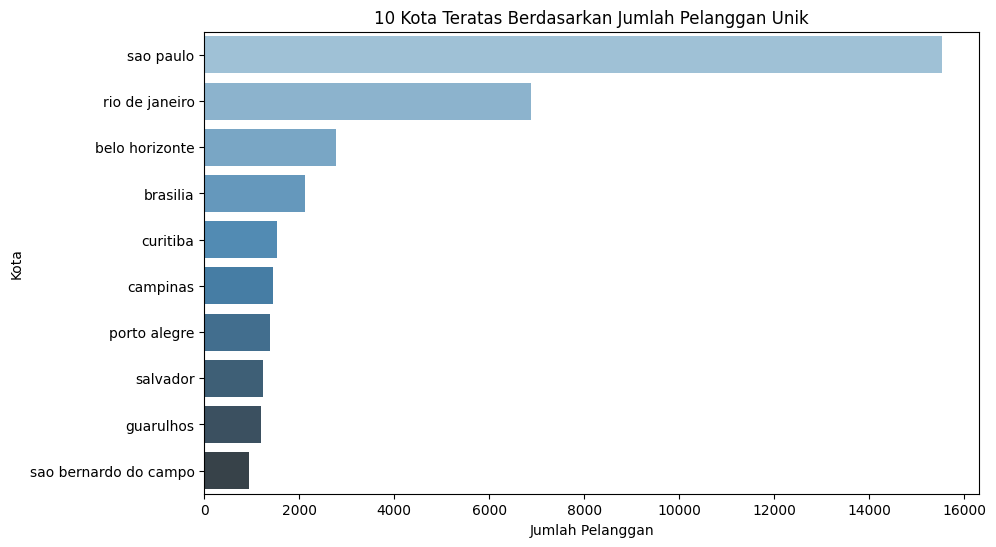

In [ ]:
# Membuat visualisasi bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=pelanggan_per_kota.head(10).values,
            y=pelanggan_per_kota.head(10).index,
            hue=None,
            palette='Blues_d',
            legend=False)
plt.title('10 Kota Teratas Berdasarkan Jumlah Pelanggan Unik')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Kota')
plt.show()

Kota yang paling banyak memiliki pelanggan adalah sao paulo dengan frekuensi pelanggan unik yang tinggi. Ini menunjukkan bahwa Sao Paulo mungkin menjadi pusat aktivitas e-commerce terbesar.

Frekuensi Pelanggan Berdasarkan Provinsi

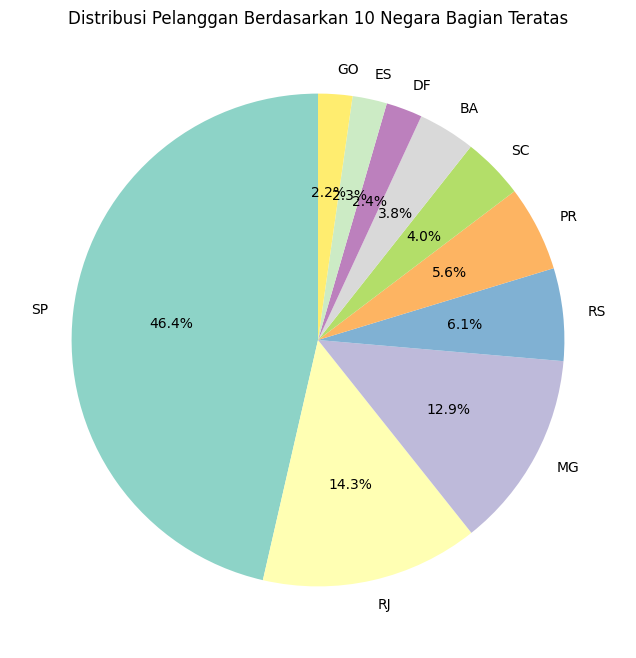

In [ ]:
# Membuat pie chart distribusi pelanggan berdasarkan negara bagian
plt.figure(figsize=(8, 8))
pelanggan_per_provinsi.head(10).plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Distribusi Pelanggan Berdasarkan 10 Negara Bagian Teratas')
plt.ylabel('')
plt.show()

Provinsi SP (São Paulo) menempati urutan pertama dengan jumlah pelanggan terbanyak, menunjukkan bahwa wilayah ini sangat mendominasi dalam pembelian.

Pelanggan yang Melakukan Pembelian Berulang

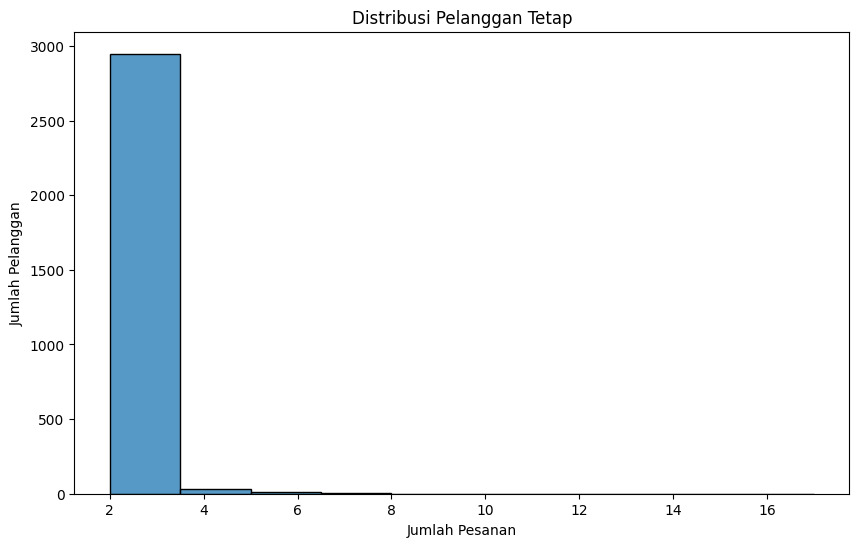

In [ ]:
# Visualisasi pelanggan berulang
plt.figure(figsize=(10, 6))
sns.histplot(customer_id_duplicates, bins=10, kde=False)
plt.title('Distribusi Pelanggan Tetap')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Jumlah Pelanggan')
plt.show()

Ada beberapa pelanggan yang melakukan pembelian berulang, namun mayoritas pelanggan hanya melakukan satu pembelian. Pelanggan dengan pembelian berulang bisa menjadi target untuk program loyalitas.

### Pertanyaan 2: Bagaimana tren rata-rata waktu pengiriman (dari tanggal pembelian hingga pengiriman ke pelanggan) dari waktu ke waktu?

In [ ]:
# Menghitung durasi pengiriman (hari) dari tanggal pembelian ke pengiriman
all_data['delivery_duration'] = (all_data['order_delivered_customer_date'] - all_data['order_purchase_timestamp']).dt.days

In [ ]:
# Filter data yang memiliki nilai valid di 'delivery_duration'
data_filtered = all_data[all_data['delivery_duration'].notnull()]

In [ ]:
# Mengelompokkan data berdasarkan bulan untuk menghitung rata-rata durasi pengiriman
data_filtered.loc[:, 'order_purchase_month'] = data_filtered['order_purchase_timestamp'].dt.to_period('M')
monthly_avg_delivery_duration = data_filtered.groupby('order_purchase_month')['delivery_duration'].mean()

<ipython-input-57-c9d3e1476e92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.loc[:, 'order_purchase_month'] = data_filtered['order_purchase_timestamp'].dt.to_period('M')


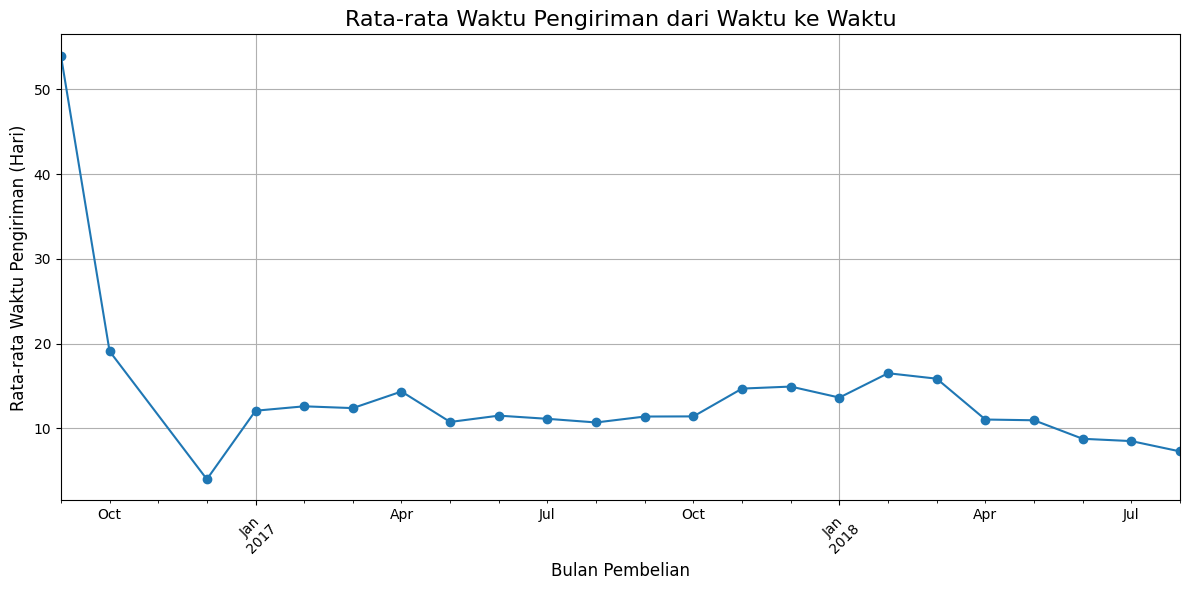

In [ ]:
# Plotting tren rata-rata waktu pengiriman dari waktu ke waktu
plt.figure(figsize=(12, 6))
monthly_avg_delivery_duration.plot(kind='line', marker='o')
plt.title('Rata-rata Waktu Pengiriman dari Waktu ke Waktu', fontsize=16)
plt.xlabel('Bulan Pembelian', fontsize=12)
plt.ylabel('Rata-rata Waktu Pengiriman (Hari)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()

Secara umum, tren rata-rata waktu pengiriman menunjukkan peningkatan yang signifikan dari waktu ke waktu. Ada penurunan tajam di awal, diikuti dengan stabilitas di kisaran waktu pengiriman 10-20 hari

### Pertanyaan 3:Kota mana yang memiliki jumlah pembeli terbanyak?

In [ ]:
other_state_geolocation = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [ ]:
geolocation_silver = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')


In [ ]:
customers_silver = all_data.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [ ]:
customers_silver.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,deliveryTime,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,delivery_duration,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-02 11:07:15,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,8.0,3149,sao paulo,SP,-23.576281,-46.587276
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-02 11:07:15,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,8.0,3149,são paulo,SP,-23.575573,-46.587384
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-07-26 03:24:27,13.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active,13.0,47813,barreiras,BA,-12.126651,-45.008162
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-08-08 08:55:23,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,9.0,75265,vianopolis,GO,-16.743812,-48.514624
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-08-08 08:55:23,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,9.0,75265,vianópolis,GO,-16.745360,-48.515884
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-11-18 19:45:59,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active,13.0,59296,sao goncalo do amarante,RN,-5.774611,-35.273994
6,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-11-18 19:45:59,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active,13.0,59296,são gonçalo do amarante,RN,-5.774727,-35.264127
7,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-13 22:20:29,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active,2.0,9195,santo andre,SP,-23.675453,-46.515098
8,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-13 22:20:29,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active,2.0,9195,santo andré,SP,-23.674557,-46.515687
9,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-09 22:10:13,2017-07-26 10:57:55,2017-07-09 22:10:13,17.0,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,Active,16.0,86320,congonhinhas,PR,-23.551192,-50.551475


In [ ]:
customers_silver = customers_silver.drop_duplicates('order_id')

In [ ]:
customers_silver.to_csv("/content/drive/MyDrive/submmission/data/geolocation.csv", index=False)

In [102]:
# Fungsi untuk memplot peta Brasil dengan heatmap
def plot_brazil_map(data):
    # Mengambil gambar peta Brasil
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'), 'jpg')

    # Membuat plot
    plt.figure(figsize=(10, 10))
    plt.imshow(brazil, extent=[-73.98283055, -33.8, -33.75116944, 5.4])

    # Membuat heatmap menggunakan seaborn
    sns.kdeplot(x=data['geolocation_lng'], y=data['geolocation_lat'], cmap="Reds", fill=True, alpha=0.5, thresh=0)

    plt.title('Heatmap Lokasi Pembeli di Brasil')
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()

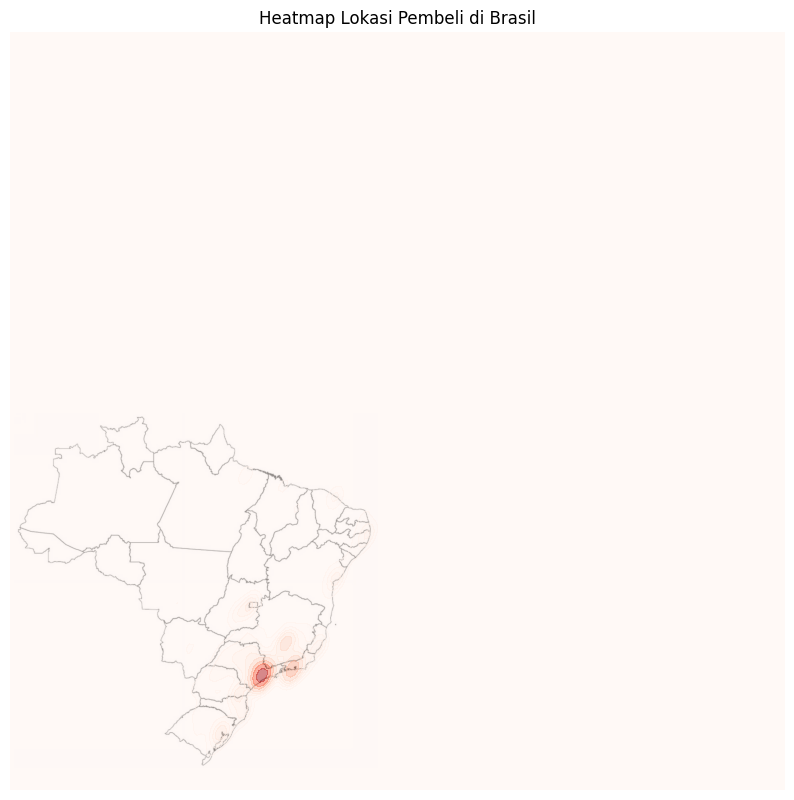

In [103]:
# Memanggil fungsi untuk memplot peta
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

In [104]:
# Menghitung jumlah pembeli per kota
customer_counts = customers_silver['customer_city'].value_counts()
print("Jumlah Pembeli per Kota:")
print(customer_counts)

Jumlah Pembeli per Kota:
customer_city
sao paulo         15509
rio de janeiro     6870
belo horizonte     2768
brasilia           1958
curitiba           1519
                  ...  
alto piquiri          1
general camara        1
jamapara              1
candido godoi         1
nova vicosa           1
Name: count, Length: 4074, dtype: int64


**Insight:**
- Kota dengan jumlah pembeli terbanyak: sao paulo dengan jumlah 15509 pembeli.

## Analisis Lanjutan (Opsional)

## Conclusion

- Pertanyaan 1: Bagaimana frekuensi pembelian pelanggan bervariasi di berbagai kota dan provinsi?

- Frekuensi pembelian pelanggan menunjukkan bahwa ada perbedaan yang signifikan antara kota dan provinsi dalam hal aktivitas pembelian.

-
Pertanyaan 2: Bagaimana tren rata-rata waktu pengiriman (dari tanggal pembelian hingga pengiriman ke pelanggan) dari waktu ke waktu?

-
Analisis tren rata-rata waktu pengiriman dapat menunjukkan perubahan dalam efisiensi pengiriman seiring berjalannya waktu. Jika rata-rata waktu pengiriman menurun, ini menandakan bahwa perusahaan telah berhasil meningkatkan proses logistik dan memenuhi ekspektasi pelanggan

-
Pertanyaan 3:Kota mana yang memiliki jumlah pembeli terbanyak?

-
Penting untuk melakukan analisis lebih lanjut mengenai karakteristik demografis dan perilaku pembelian di kota-kota ini untuk lebih memahami mengapa beberapa kota memiliki lebih banyak pembeli dibandingkan yang lain.